# Data Processing
Selected datasets: 
- [2014 SAT Scores](https://www.kaggle.com/nycopendata/high-schools)
- [Funding per student](https://chalkbeat.org/posts/ny/2018/08/31/find-out-what-your-new-york-city-school-spends-per-student/)
- [School Safety Report](https://data.cityofnewyork.us/Education/2010-2016-School-Safety-Report/qybk-bjjc)
- [Graduation Rate](https://infohub.nyced.org/reports-and-policies/citywide-information-and-data/graduation-results)
- [School Quality Index](https://data.cityofnewyork.us/Education/2014-2015-School-Quality-Reports-Results-For-High-/vrfr-9k4d )
- [Demographic Snapshot](https://data.cityofnewyork.us/Education/2013-2018-Demographic-Snapshot-School/s52a-8aq6)

All datasets were concatenated using the school identification number (DNB)

## 0. Import Statements

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [132]:
fundingDF = pd.read_csv("funding_2012_2014.csv")
gradDF = pd.read_csv("grad_rates.csv")
satDF = pd.read_csv("sat_2014.csv")
safetyDF = pd.read_csv("school_safety.csv")
demographicsDF = pd.read_csv("2013-18_demographic_snapshot.csv")
qualityDF = pd.read_csv('quality_survey.csv')

## 1. mergedDF: Concatenating Funding & School Quality Report

In [133]:
fundingDF.head(5)

del fundingDF['Unnamed: 0']

In [134]:
def convert_DBN(dbn):
    try:
        dbn = dbn[2:]
    except:
        pass
    return dbn

In [135]:
qualityDF = qualityDF[['DBN', 'Economic Need Index',
 'Percent Asian', 'Percent White', 'Percent Hispanic',
 'Percent Black', 'Student Attendance Rate',
 'Percent of Students Chronically Absent',
 'Supportive Environment - Percent Positive',
'Percent English Language Learners',
'Percent Students with Disabilities']]

In [136]:
qualityDF['DBN'] = qualityDF['DBN'].apply(convert_DBN)

In [137]:
mergedDF = pd.merge(fundingDF, qualityDF)

In [140]:
print(len(mergedDF))

409


## 2. mergedDF_v2: Concatenating School Safety

In [141]:
safetyDF = pd.read_csv("school_safety.csv")
safetyDF = safetyDF[safetyDF['School Year'] == '2013-14']
safetyDF.head(5)
safetyDF = safetyDF[['DBN', 'Latitude', 'Longitude', 'School Year', 'AvgOfNoCrim N']]

In [142]:
safetyDF.head(5)

,DBN,Latitude,Longitude,School Year,AvgOfNoCrim N
4151,14K050,40.711704,-73.960275,2013-14,NaN
4152,84K182,40.711704,-73.960275,2013-14,NaN
4153,19K108,40.681268,-73.884063,2013-14,2.49
4154,NaN,40.709941,-73.943641,2013-14,5.55
4155,14K449,40.709941,-73.943641,2013-14,NaN


#### Understanding the missing values in Average Number of Crimes
Here We are looking into whether there is any systematic reason why there are so many NaN values. We argue that since there are no zero observations NaN values are in fact zeros.

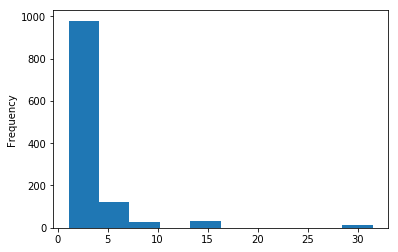

In [143]:
safetyDF['AvgOfNoCrim N'].plot(kind = 'hist')

In [144]:
safetyDF['AvgOfNoCrim N'] = safetyDF['AvgOfNoCrim N'].fillna(0)
safetyDF['DBN'] = safetyDF['DBN'].apply(convert_DBN)
safetyDF.head(5)

,DBN,Latitude,Longitude,School Year,AvgOfNoCrim N
4151,K050,40.711704,-73.960275,2013-14,0.00
4152,K182,40.711704,-73.960275,2013-14,0.00
4153,K108,40.681268,-73.884063,2013-14,2.49
4154,NaN,40.709941,-73.943641,2013-14,5.55
4155,K449,40.709941,-73.943641,2013-14,0.00


In [145]:
mergedDF_v2 = pd.merge(mergedDF, safetyDF)

In [146]:
print(len(mergedDF_v2))

410


In [151]:
mergedDF_v2

,DBN,AY12-13,AY13-14,Economic Need Index,Percent Asian,Percent White,Percent Hispanic,Percent Black,Student Attendance Rate,Percent of Students Chronically Absent,Supportive Environment - Percent Positive,Percent English Language Learners,Percent Students with Disabilities,Latitude,Longitude,School Year,AvgOfNoCrim N
0,M292,2357841,2276174,83.2%,13.2%,3.9%,56.6%,24.4%,76.6%,56.8%,77%,12.7%,29.8%,40.713684,-73.986336,2013-14,0.00
1,M448,2190592,1967439,81.2%,29.9%,3.3%,41.1%,25.0%,88.0%,34.7%,87%,19.4%,22.0%,40.712399,-73.984497,2013-14,1.09
2,M450,3745068,3700670,61.0%,9.4%,8.3%,57.9%,22.1%,93.8%,16.5%,92%,1.8%,23.4%,40.729589,-73.982555,2013-14,1.76
3,M509,2198272,2302771,76.7%,5.8%,2.5%,51.2%,39.9%,76.8%,64.7%,81%,9.1%,28.4%,40.720581,-73.985645,2013-14,0.00
4,M539,6808136,7034224,25.7%,38.5%,28.6%,18.0%,13.3%,95.2%,13.0%,85%,0.2%,4.3%,40.718895,-73.979308,2013-14,6.51
5,M696,3155058,3247592,31.4%,17.1%,45.3%,18.7%,17.2%,95.8%,6.2%,91%,0.0%,1.1%,40.719029,-73.975891,2013-14,1.76
6,M135,0,911543,71.3%,5.7%,2.6%,62.2%,28.5%,88.3%,34.8%,88%,7.3%,19.7%,40.763370,-73.990593,2013-14,0.00
7,M139,0,933883,71.4%,3.6%,8.8%,61.1%,24.9%,88.1%,40.3%,82%,7.8%,29.5%,40.711442,-74.000851,2013-14,0.00
8,M288,2607632,2672246,68.7%,4.7%,3.0%,52.2%,39.6%,88.5%,40.5%,81%,3.0%,15.7%,40.765184,-73.992953,2013-14,0.00
9,M294,1944793,2011826,63.3%,5.9%,11.7%,41.3%,38.5%,86.3%,31.8%,88%,4.2%,26.0%,40.716778,-73.989337,2013-14,0.00


## 3. mergedDF_v3: Concatenating Graduation Rates

In [157]:
gradDF = pd.read_csv("grad_rates.csv")
gradDF_narrow = gradDF[gradDF['Cohort Year'] == 2014]
gradDF_narrow = gradDF_narrow[gradDF_narrow['Cohort'] == '4 year August']
gradDF_narrow = gradDF_narrow[['DBN', 'Total Grads', 'Dropout', 'Still Enrolled']]

In [158]:
gradDF_narrow['DBN'] = gradDF_narrow['DBN'].apply(convert_DBN)

In [159]:
gradDF_narrow

,DBN,Total Grads,Dropout,Still Enrolled
0,M292,28,1,0
51,M448,82,3,3
108,M450,89,1,2
165,M458,27,12,34
205,M509,27,8,6
262,M515,91,55,74
319,M539,123,2,6
376,M650,31,22,48
433,M696,133,0,2
490,M047,30,2,3


In [160]:
mergedDF_v3 = pd.merge(mergedDF_v2, gradDF_narrow)

In [161]:
print(len(mergedDF_v3))

409


In [162]:
satDF['School ID'] = satDF['School ID'].apply(convert_DBN)

In [163]:
satDF = satDF[['School ID', 'Average Score (SAT Math)', 'Average Score (SAT Reading)',
       'Average Score (SAT Writing)', 'Percent Tested']]

In [164]:
satDF = satDF.rename(index=str, columns={'School ID': "DBN"})

In [165]:
mergedDF_v4 = pd.merge(mergedDF_v3, satDF)

In [166]:
print(len(mergedDF_v4))

409


In [167]:
mergedDF_v4.to_csv('final.csv')